In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

print(f'The data has a shape of {X.shape}, and the target has a shape of {y.shape}')

The data has a shape of (569, 30), and the target has a shape of (569,)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'The training set has {X_train.shape[0]} datapoints and the test set has {X_test.shape[0]} datapoints.')
print(f'Before normalization, the max of training data is {X_train.max():.2f} and the min is {X_train.min():.2f}.')

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f'After normalization, the max of training data is {X_train.max():.2f} and the min is {X_train.min():.2f}.')


The training set has 455 datapoints and the test set has 114 datapoints.
Before normalization, the max of training data is 4254.00 and the min is 0.00.
After normalization, the max of training data is 1.00 and the min is 0.00.


In [3]:
from sklearn.linear_model import LogisticRegression

# C is inverse of regularization strength, smaller C means larger regularization strength
model = LogisticRegression(solver='liblinear')#, penalty='l1', C=1)
model.fit(X_train, y_train)

# interpretation of feature importance using coefficient vector w
w = model.coef_.flatten()
print("sorting w vector based on magnitude (smallest to largest):")
print(w[np.argsort(abs(w))])
print("index of sorted features based on magnitude (smallest to largest):")
print(np.argsort(abs(w)))

sorting w vector based on magnitude (smallest to largest):
[ 0.07013664 -0.18479673  0.18763991  0.30502547  0.31399343  0.34033398
  0.4077608  -0.42520632  0.6141203  -0.69759503  0.714699    0.76673299
 -0.83268067 -0.84139638 -0.84323605 -0.87761424 -0.88454036 -0.95579136
 -0.99668408 -1.04014459 -1.18965914 -1.26136892  1.32699339 -1.42438814
 -1.49053236 -1.54604726 -1.67524662 -1.69562831 -2.16021918 -2.35770497]
index of sorted features based on magnitude (smallest to largest):
[ 8 29 17 14  4 11 16  5 18 24 19 15 13 25  0  2 12  1 28  3 10 26  9 23
 22 21 20  6 27  7]


In [4]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f'The test accuracy is {accuracy:.4f}')

The test accuracy is 0.9737


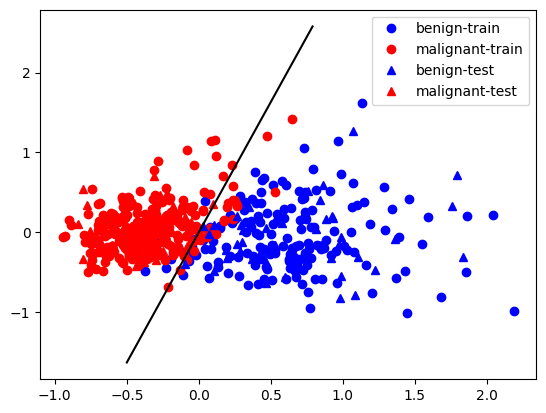

In [5]:
# visualization of data using PCA
plt.figure(0)

projection = PCA(n_components=2).fit(X_train)
z = projection.transform(X_train)
x0_train = z[y_train==0]
x1_train = z[y_train==1]

z = projection.transform(X_test)
x0_test = z[y_test==0]
x1_test = z[y_test==1]

ww = projection.transform(w.reshape(1, -1)).reshape(-1)

xx = np.arange(-0.5, 0.8, 0.01)
yy = -ww[0]*xx / ww[1]
plt.plot(x0_train[:,0], x0_train[:,1], 'o', color='blue');
plt.plot(x1_train[:,0], x1_train[:,1], 'o', color='red');
plt.plot(x0_test[:,0], x0_test[:,1], '^', color='blue');
plt.plot(x1_test[:,0], x1_test[:,1], '^', color='red');
plt.plot(xx, yy, '-', color='black');
plt.legend(['benign-train', 'malignant-train', 'benign-test', 'malignant-test'])